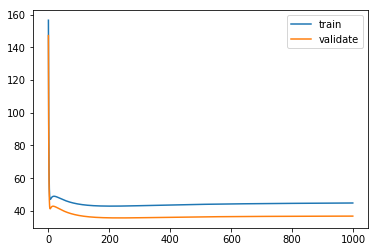

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

data = load_svmlight_file('./housing_scale')
another2 = np.ones(shape=[506,1])
x_train,x_validate,y_train,y_validate = train_test_split(data[0],data[1],test_size=0.33)
x_train = x_train.todense()
x_validate = x_validate.todense()
y_train = np.mat(y_train)
y_validate = np.mat(y_validate)
another = np.ones(shape=[339,1])
another1 = np.ones(shape=[167,1])
x_train = np.hstack((x_train,another))
x_validate = np.hstack((x_validate,another1))
init_w = np.zeros(shape=[14,1])

train_list=[]
test_list=[]

def train(num_iter):
    learning_rate = 0.0001
    w  = init_w
    gradient = -2 * np.dot(x_train.T, (np.dot(x_train, init_w)) - data[1].T)
    for i in range(num_iter):
        w = w + learning_rate * gradient
        loss = 0.5 * 1/339 * np.dot((y_train.T - np.dot(x_train, w)).T, y_train.T - np.dot(x_train, w))
        loss1 = 0.5 *1/167 * np.dot((y_validate.T - np.dot(x_validate, w)).T, y_validate.T - np.dot(x_validate, w))
        gradient = -2 * np.dot(x_train.T, (np.dot(x_train, w)) - data[1].T)
        z = loss.tolist()
        q = loss1.tolist()[0][0]
        train_list.append(z[0][0])
        test_list.append(q)

    plt.plot(np.arange(0,num_iter),train_list,label=u'train')
    plt.plot(np.arange(0,num_iter),test_list,label=u'validate')
    plt.legend()
    plt.show()

train(1000)